In [13]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd

In [14]:
MAX_PATIENCE = 10
configs = [
    {
        'alg': 'gradient_descent',
        'lr': 1e-7,
        'clip': 5,
        'max_attempts': 100,
        'hidden_nodes': [10],
        'max_patience': MAX_PATIENCE, 
    },
    {
        'alg': 'gradient_descent',
        'lr': 1e-8,
        'clip': 5,
        'max_attempts': 100,
        'hidden_nodes': [10],
        'max_patience': MAX_PATIENCE, 
    },
    {
        'alg': 'gradient_descent',
        'lr': 1e-9,
        'clip': 5,
        'max_attempts': 100,
        'hidden_nodes': [10],
        'max_patience': MAX_PATIENCE, 
    },
]

In [15]:
COLORS = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

1e-07
3401
1301
1201
1e-08
4101
3201
2201
1e-09
401
6301
201


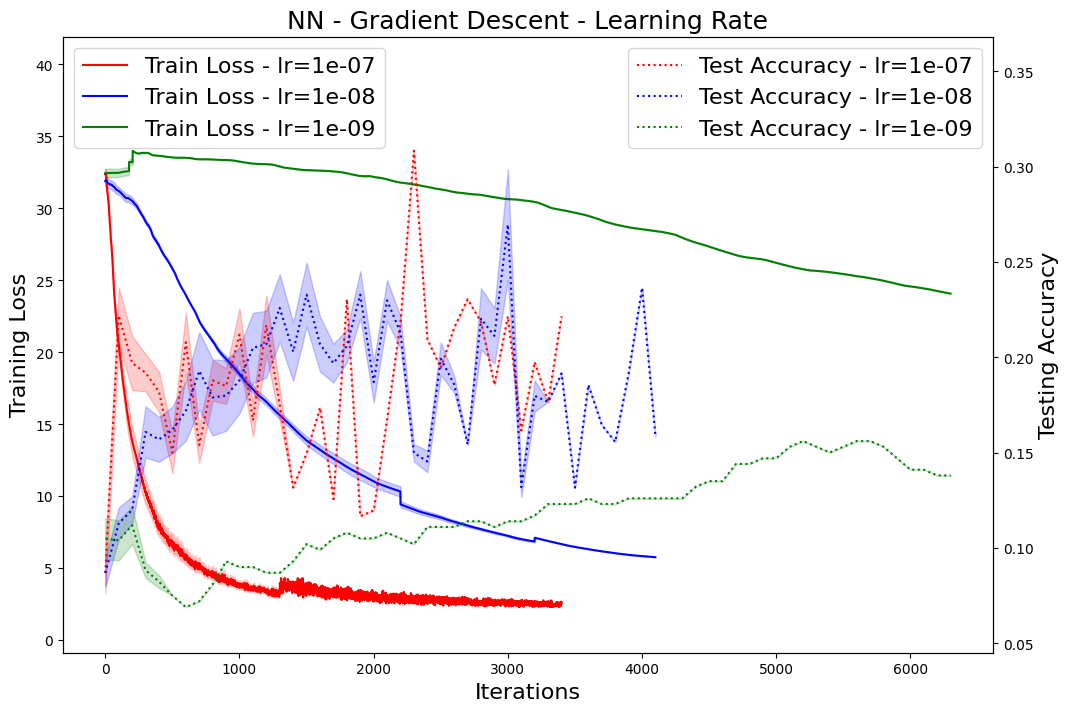

In [23]:
FONTSIZE = 18
# use two y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('NN - Gradient Descent - Learning Rate', fontsize=FONTSIZE)
ax2 = ax1.twinx()
ax1.set_xlabel('Iterations', fontsize=FONTSIZE-2)
ax1.set_ylabel('Training Loss', fontsize=FONTSIZE-2)
ax2.set_ylabel('Testing Accuracy', fontsize=FONTSIZE-2)

max_y1 = 0
min_y1 = np.inf
max_y2 = 0
min_y2 = np.inf

for config_i, config in enumerate(configs):
    path = "metrics/{alg}/{alg}_pat{max_patience}_lr{lr}_clip{clip}_max_attempts{max_attempts}_hidden_nodes{hidden_nodes}.pkl".format(**config)
    data = pickle.load(open(path, "rb"))

    mean_test_accuracies = []
    std_test_accuracies = []
    n = max([len(run['test_scores']) for run in data['runs']])
    for i in range(n):
        accuracies = [run['test_scores'][i] for run in data['runs'] if i < len(run['test_scores'])]
        mean_test_accuracies.append(np.mean(accuracies))
        std_test_accuracies.append(np.std(accuracies))
    mean_test_accuracies = np.array(mean_test_accuracies)
    std_test_accuracies = np.array(std_test_accuracies) / 4
    max_y2 = max(max_y2, np.max(mean_test_accuracies + std_test_accuracies))
    min_y2 = min(min_y2, np.min(mean_test_accuracies - std_test_accuracies))
    
    max_len = 0
    iterations = None
    print(config['lr'])
    for run in data['runs']:
        print(run['iterations'].max())
        if len(run['iterations']) > max_len:
            max_len = len(run['iterations'])
            iterations = run['iterations']
    iterations = np.array(iterations)
        
    mean_train_losss = []
    std_train_losss = []
    n = max([len(run['fitness_curve']) for run in data['runs']])
    for i in range(n):
        losses = [run['fitness_curve'][i] for run in data['runs'] if i < len(run['fitness_curve'])]
        mean_train_losss.append(np.mean(losses))
        std_train_losss.append(np.std(losses))
    mean_train_losss = np.array(mean_train_losss)
    std_train_losss = np.array(std_train_losss) / 4
    max_y1 = max(max_y1, np.max(mean_train_losss + std_train_losss))
    min_y1 = min(min_y1, np.min(mean_train_losss - std_train_losss))

    FILL_ALPHA = 0.2

    ax1.plot(mean_train_losss, label="Train Loss - lr={lr}".format(**config), 
             linestyle='-', color=COLORS[config_i])
    ax1.fill_between(range(len(mean_train_losss)), 
                     mean_train_losss - std_train_losss, 
                     mean_train_losss + std_train_losss, 
                     alpha=FILL_ALPHA, color=COLORS[config_i])

    ax2.plot(iterations, mean_test_accuracies, label="Test Accuracy - lr={lr}".format(**config), 
             linestyle='dotted', color=COLORS[config_i])
    ax2.fill_between(iterations, 
                     mean_test_accuracies - std_test_accuracies, 
                     mean_test_accuracies + std_test_accuracies, 
                     alpha=FILL_ALPHA, color=COLORS[config_i])

range_1 = max_y1 - min_y1
range_2 = max_y2 - min_y2
lower_margin = 0.1
upper_margin = 0.25
ax1.set_ylim(min_y1 - lower_margin * range_1, max_y1 + upper_margin * range_1)
ax2.set_ylim(min_y2 - lower_margin * range_2, max_y2 + upper_margin * range_2)

ax1.legend(loc='upper left', fontsize=FONTSIZE-2)
ax2.legend(loc='upper right', fontsize=FONTSIZE-2)
fig.savefig('nn_gd_lr.png')

In [17]:
config

{'alg': 'gradient_descent',
 'lr': 1e-09,
 'clip': 5,
 'max_attempts': 100,
 'hidden_nodes': [10],
 'max_patience': 10}

In [21]:
df_data = {'Algorithm': [], 'Learning Rate': [], 'Max Attempts': [], 'Test Accuracy': []}

for config_i, config in enumerate(configs):
    path = "metrics/{alg}/{alg}_pat{max_patience}_lr{lr}_clip{clip}_max_attempts{max_attempts}_hidden_nodes{hidden_nodes}.pkl".format(**config)
    data = pickle.load(open(path, "rb"))

    mean_test_accuracies = []
    std_test_accuracies = []
    n = max([len(run['test_scores']) for run in data['runs']])
    for i in range(n):
        accuracies = [run['test_scores'][i] for run in data['runs'] if i < len(run['test_scores'])]
        mean_test_accuracies.append(np.mean(accuracies))
        std_test_accuracies.append(np.std(accuracies))
    mean_test_accuracies = np.array(mean_test_accuracies)
    std_test_accuracies = np.array(std_test_accuracies)
    
    max_len = 0
    iterations = None
    for run in data['runs']:
        if len(run['iterations']) > max_len:
            max_len = len(run['iterations'])
            iterations = run['iterations']
    iterations = np.array(iterations)
        
    mean_train_losss = []
    std_train_losss = []
    n = max([len(run['fitness_curve']) for run in data['runs']])
    for i in range(n):
        losses = [run['fitness_curve'][i] for run in data['runs'] if i < len(run['fitness_curve'])]
        mean_train_losss.append(np.mean(losses))
        std_train_losss.append(np.std(losses))
    mean_train_losss = np.array(mean_train_losss)
    std_train_losss = np.array(std_train_losss)

    index = np.argmax(mean_test_accuracies)
    test_acc = mean_test_accuracies[index]
    test_acc_std = std_test_accuracies[index]

    df_data['Algorithm'].append(config['alg'])
    df_data['Learning Rate'].append(f"{config['lr']:0.1e}")
    df_data['Max Attempts'].append(config['max_attempts'])
    df_data['Test Accuracy'].append(f"{test_acc:.2%}")
pd.DataFrame(df_data).style.hide(axis='index')

Algorithm,Learning Rate,Max Attempts,Test Accuracy
gradient_descent,1.0e-07,100,30.84%
gradient_descent,1.0e-08,100,26.97%
gradient_descent,1.0e-09,100,15.62%
